# Bag-of-Words vs TF–IDF: Expanded Showcase

This notebook demonstrates **Bag-of-Words (BoW)** and **Term Frequency–Inverse Document Frequency (TF–IDF)** step by step.  


## 0. Set-up (install & downloads)

In [ ]:
# The following modules should already be installed if you are using Binder cloud environment.
# If you are running other environments, please uncomment the next lines and run only once:

#!pip install pandas
#!pip install scikit-learn


## 1. Imports & Configuration

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2: Define a Small Corpus
Here we define a **tiny corpus** of three-five sentences. Each represents a distinct idea or news headline.  

This mix makes it easier to see how BoW and TF–IDF differentiate themes.

There are several options (document blocks) - select one:

In [11]:
docs = [
    "This movie is very scary and long.",
    "This movie is not scary and is slow.",
    "This movie is spooky and good."
]

In [10]:
docs = [
    "The quick brown fox jumped over the lazy dog.",
    "The dog slept under the tree.",
    "Foxes are quicker than dogs."
]

In [77]:
docs = [
    "Apple reports strong earnings and sustainable growth.",
    "Microsoft announces new green energy initiative.",
    "Oil prices fell as OPEC signals higher supply.",
    "Tesla expands EV production and reports record deliveries."
]

In [8]:
docs = [
    "In astronomy, the Big Bang is the prevailing cosmological model explaining the existence of the observable universe from the earliest known periods through its subsequent large-scale evolution.",
    "Literature often reflects cultural norms and societal values, weaving narratives that range from the mundane to the extraordinary, challenging our perspectives and deepening our understanding of society.",
    "Advancements in artificial intelligence and machine learning are transforming industries, enabling new technologies like autonomous vehicles and personalized medicine, and reshaping the landscape of work and play.",
    "In economics, the concept of supply and demand is fundamental, explaining how market economies allocate resources and determine the prices of goods and services.",
    "Climate change is a pressing global issue, characterized by changes in weather patterns, rising sea levels, and increasing occurrences of extreme weather events, calling for urgent action and sustainable practices."
]

In [55]:
docs = [
    "Sustainable finance promotes investment in renewable energy, green bonds, and climate solutions. Investors consider ESG factors to reduce carbon risk and support long term value.",
    "Banks are integrating ESG principles into lending practices. Green loans and sustainability linked bonds encourage firms to improve governance and lower emissions.",
    "Regulators demand climate risk disclosure and transparent reporting. ESG reporting frameworks guide companies in measuring sustainability performance and carbon footprints.",
    "Critics argue that some ESG ratings are inconsistent, raising concerns about greenwashing and selective disclosure. Transparency and reliable data remain challenges in sustainable finance.",
    "AI and machine learning help investors analyse ESG reports and news. These tools identify sustainability risks, highlight controversies, and improve decision making in finance."
]

In [20]:
docs = [
    # 1 – investing/renewables (avoid “ESG”, “sustainable finance”)
    "Responsible investing channels capital toward wind and solar projects via climate-linked securities. Asset owners weigh non-financial criteria to curb greenhouse exposure and preserve durable value.",

    # 2 – banking/lending (avoid words from doc 1)
    "Commercial lenders embed sustainability targets in loan covenants. Performance-linked facilities reward firms that tighten board oversight and shrink CO₂ output.",

    # 3 – regulation/reporting (fresh lexicon)
    "Market supervisors require climate-risk statements and audit-ready metrics. Reporting blueprints help issuers quantify stewardship and life-cycle footprints.",

    # 4 – ratings/greenwashing (paraphrase with different terms)
    "Analysts flag score misalignment and reputational varnish—selective narratives can mask weaknesses. Gaps in transparency and data quality still impede sustainable allocation.",

    # 5 – AI/NLP for analysis (no overlap with earlier keywords)
    "Language models analyse corporate filings and news to surface controversies, chart transition hazards, and guide portfolio decisions."
]

In [21]:
print("You have chosen the following document:\n")
docs

You have chosen the following document:



['Responsible investing channels capital toward wind and solar projects via climate-linked securities. Asset owners weigh non-financial criteria to curb greenhouse exposure and preserve durable value.',
 'Commercial lenders embed sustainability targets in loan covenants. Performance-linked facilities reward firms that tighten board oversight and shrink CO₂ output.',
 'Market supervisors require climate-risk statements and audit-ready metrics. Reporting blueprints help issuers quantify stewardship and life-cycle footprints.',
 'Analysts flag score misalignment and reputational varnish—selective narratives can mask weaknesses. Gaps in transparency and data quality still impede sustainable allocation.',
 'Language models analyse corporate filings and news to surface controversies, chart transition hazards, and guide portfolio decisions.']

## 3: Bag-of-Words and TF–IDF Representations

In [22]:
# Bag-of-Words model
cv = CountVectorizer()
bow = cv.fit_transform(docs)
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
print("Bag-of-Words:")
display(bow_df.style.format("{:.2f}").background_gradient(cmap="Reds", vmin=0, vmax=1))
print("\n")

# TF-IDF model
tfidf = TfidfVectorizer(smooth_idf=False) # argument "smooth_idf=False" is to get “classic” IDF (zero for ubiquitous terms)
tfidf_mat = tfidf.fit_transform(docs)
tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=tfidf.get_feature_names_out())

# --- Separate TF ---
# Term frequency is just BOW normalized by row sums
tf_df = bow_df.div(bow_df.sum(axis=1), axis=0)
print("TF:")
display(tf_df.style.format("{:.2f}").background_gradient(cmap="Blues", vmin=0, vmax=1))
print("\n")

# --- Separate IDF ---
idf_vals = tfidf.idf_   # learned IDF values
idf_df = pd.DataFrame([idf_vals], columns=tfidf.get_feature_names_out())
print("IDF:")
display(idf_df.style.format("{:.2f}").background_gradient(cmap="Greens", vmin=0, vmax=max(idf_vals)))
print("\n")

print("TF-IDF:")
display(tfidf_df.style.format("{:.2f}").background_gradient(cmap="Reds", vmin=0, vmax=1))




Bag-of-Words:


,allocation,analyse,analysts,and,asset,audit,blueprints,board,can,capital,channels,chart,climate,commercial,controversies,corporate,covenants,co₂,criteria,curb,cycle,data,decisions,durable,embed,exposure,facilities,filings,financial,firms,flag,footprints,gaps,greenhouse,guide,hazards,help,impede,in,investing,issuers,language,lenders,life,linked,loan,market,mask,metrics,misalignment,models,narratives,news,non,output,oversight,owners,performance,portfolio,preserve,projects,quality,quantify,ready,reporting,reputational,require,responsible,reward,risk,score,securities,selective,shrink,solar,statements,stewardship,still,supervisors,surface,sustainability,sustainable,targets,that,tighten,to,toward,transition,transparency,value,varnish,via,weaknesses,weigh,wind
0,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,2.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
4,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00




TF:


,allocation,analyse,analysts,and,asset,audit,blueprints,board,can,capital,channels,chart,climate,commercial,controversies,corporate,covenants,co₂,criteria,curb,cycle,data,decisions,durable,embed,exposure,facilities,filings,financial,firms,flag,footprints,gaps,greenhouse,guide,hazards,help,impede,in,investing,issuers,language,lenders,life,linked,loan,market,mask,metrics,misalignment,models,narratives,news,non,output,oversight,owners,performance,portfolio,preserve,projects,quality,quantify,ready,reporting,reputational,require,responsible,reward,risk,score,securities,selective,shrink,solar,statements,stewardship,still,supervisors,surface,sustainability,sustainable,targets,that,tighten,to,toward,transition,transparency,value,varnish,via,weaknesses,weigh,wind
0,0.00,0.00,0.00,0.07,0.04,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.04,0.00,0.04,0.00,0.04,0.04
1,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.10,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.05,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.05,0.00,0.05,0.09,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.05,0.00,0.00
4,0.00,0.06,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00




IDF:


,allocation,analyse,analysts,and,asset,audit,blueprints,board,can,capital,channels,chart,climate,commercial,controversies,corporate,covenants,co₂,criteria,curb,cycle,data,decisions,durable,embed,exposure,facilities,filings,financial,firms,flag,footprints,gaps,greenhouse,guide,hazards,help,impede,in,investing,issuers,language,lenders,life,linked,loan,market,mask,metrics,misalignment,models,narratives,news,non,output,oversight,owners,performance,portfolio,preserve,projects,quality,quantify,ready,reporting,reputational,require,responsible,reward,risk,score,securities,selective,shrink,solar,statements,stewardship,still,supervisors,surface,sustainability,sustainable,targets,that,tighten,to,toward,transition,transparency,value,varnish,via,weaknesses,weigh,wind
0,2.61,2.61,2.61,1.00,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,1.92,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,1.92,2.61,2.61,2.61,2.61,2.61,1.92,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,1.92,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61,2.61




TF-IDF:


,allocation,analyse,analysts,and,asset,audit,blueprints,board,can,capital,channels,chart,climate,commercial,controversies,corporate,covenants,co₂,criteria,curb,cycle,data,decisions,durable,embed,exposure,facilities,filings,financial,firms,flag,footprints,gaps,greenhouse,guide,hazards,help,impede,in,investing,issuers,language,lenders,life,linked,loan,market,mask,metrics,misalignment,models,narratives,news,non,output,oversight,owners,performance,portfolio,preserve,projects,quality,quantify,ready,reporting,reputational,require,responsible,reward,risk,score,securities,selective,shrink,solar,statements,stewardship,still,supervisors,surface,sustainability,sustainable,targets,that,tighten,to,toward,transition,transparency,value,varnish,via,weaknesses,weigh,wind
0,0.00,0.00,0.00,0.16,0.20,0.00,0.00,0.00,0.00,0.20,0.20,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.00,0.00,0.00,0.20,0.00,0.20,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.20,0.00,0.00,0.20,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.20,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.20,0.00,0.00,0.20,0.00,0.20,0.00,0.20,0.20
1,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.23,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.23,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.23,0.00,0.17,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.23,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.23,0.23,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.18,0.00,0.23,0.23,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.23,0.00,0.00,0.23,0.00,0.00,0.23,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.23,0.23,0.00,0.23,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.23,0.23,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.22,0.00,0.22,0.17,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.22,0.00,0.00,0.00,0.00,0.22,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.22,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.22,0.00,0.22,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.22,0.00,0.22,0.00,0.00
4,0.00,0.26,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00



- **Bag-of-Words (BoW):** counts how many times each word appears in each document.  
- **TF–IDF:** weights words based on their importance: frequent in one document but rare across the corpus.  

**What TF–IDF measures**
- **TF (term frequency)**: how often a term appears in a given document.
- **IDF (inverse document frequency)**: how rare that term is across the corpus.
- **TF–IDF = TF × IDF:** high when a term is frequent in one document but uncommon across documents  


## 4: Visualising term Weights using BOW and TF-IDF

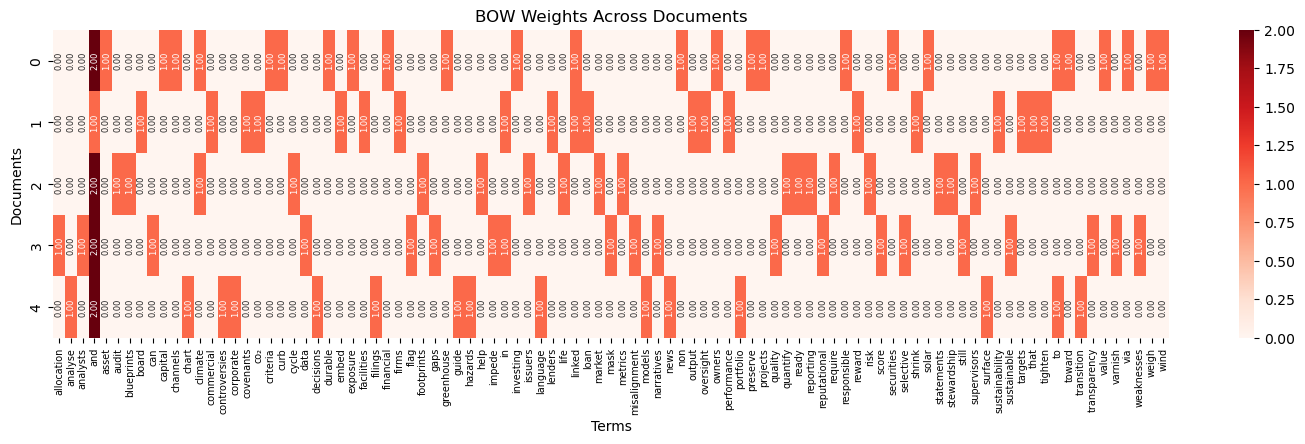

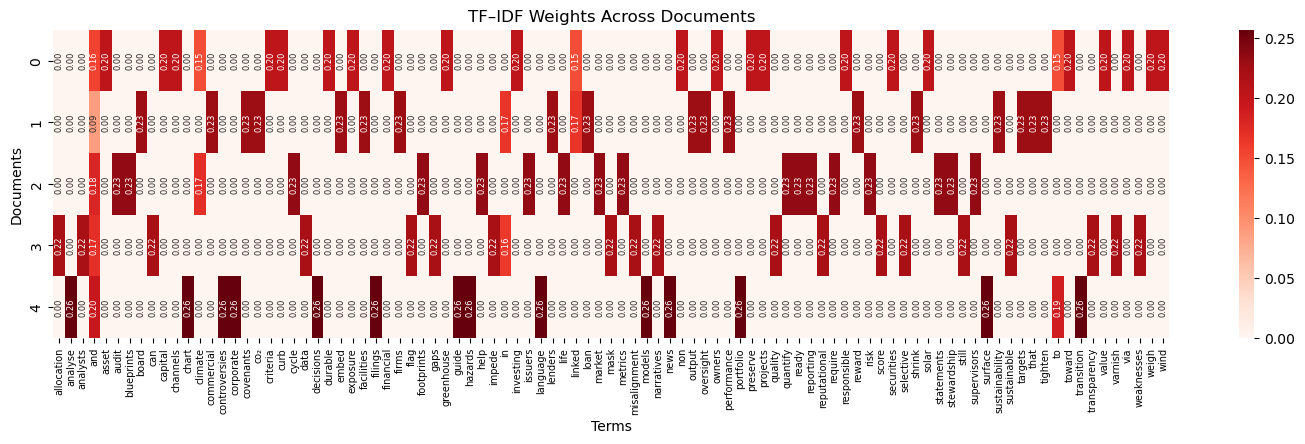

In [23]:
plt.figure(figsize=(18,4))
sns.heatmap(bow_df, xticklabels=bow_df.columns, cmap="Reds", annot=True, fmt=".2f", annot_kws={"size":6,"rotation":90})
plt.title("BOW Weights Across Documents")
plt.xlabel("Terms")
plt.xticks(fontsize=7, rotation=90)
plt.ylabel("Documents")
plt.show()

plt.figure(figsize=(18,4))
sns.heatmap(tfidf_df, xticklabels=tfidf_df.columns, cmap="Reds", annot=True, fmt=".2f", annot_kws={"size":6,"rotation":90})
plt.title("TF–IDF Weights Across Documents")
plt.xlabel("Terms")
plt.xticks(fontsize=7, rotation=90)
plt.ylabel("Documents")
plt.show()



The heatmap reveals which words are most distinctive per document.  
- Compare numbers **within the document**, not across documents.
- Greater values = higher importance.   

If you rank terms **across all documents** you first need an aggregation per term. There are different ways to do it:
- by `sum`: high = terms that are consistently informative across multiple docs (not stopwords, not one-off quirks).
- by `mean`: similar to sum but downweights terms boosted by lots of occurrences in a few long docs; think typical importance per doc.
- by `max`: surfaces spiky terms—those that are highly distinctive in one document (great for finding document-specific jargon).

In [24]:
K = 50                    # top-K terms to display
aggregation_choice='max'  # choose from: 'sum', 'mean', 'max'

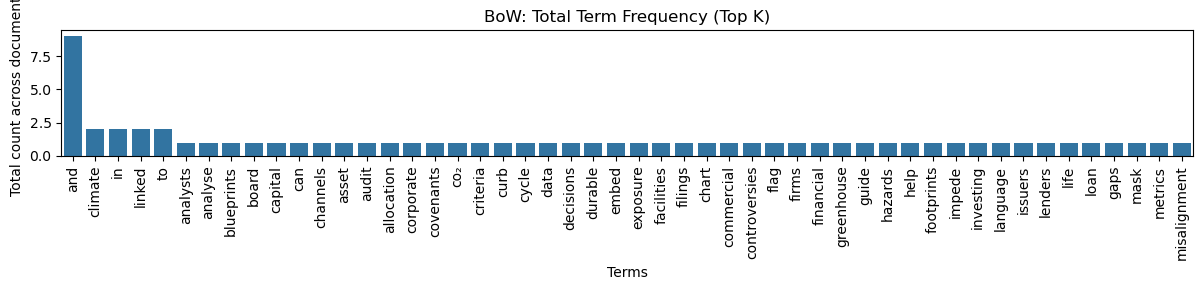

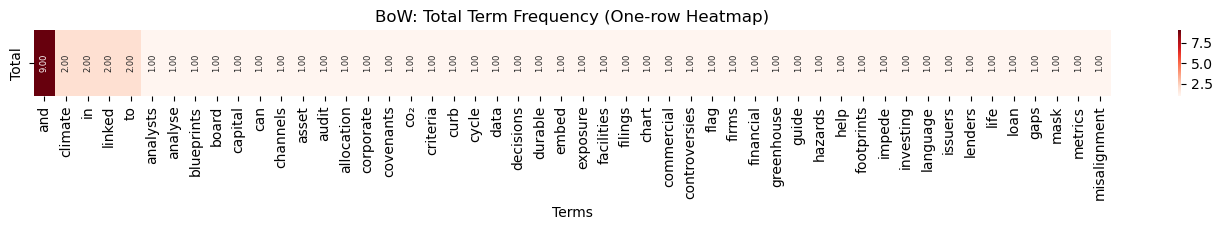

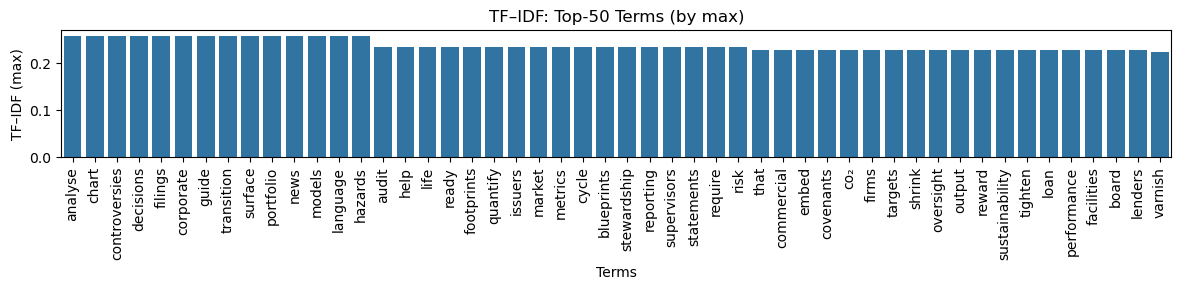

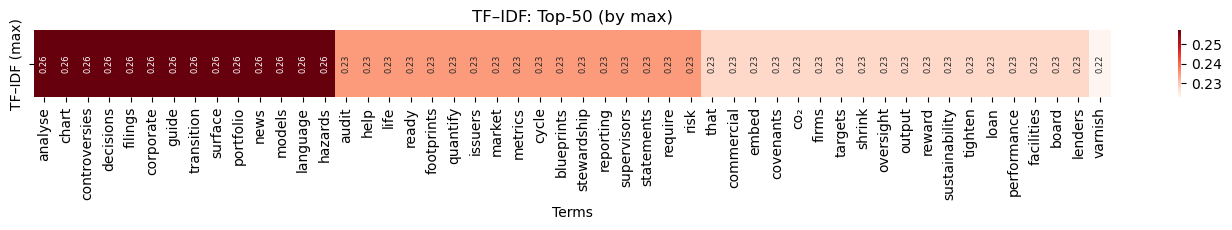

In [25]:
bow_totals = bow_df.sum(axis=0).sort_values(ascending=False)
bow_top = bow_totals.head(K)

# Bar plot
plt.figure(figsize=(12,3))
sns.barplot(x=bow_top.index, y=bow_top.values)
plt.title("BoW: Total Term Frequency (Top K)")
plt.xlabel("Terms")
plt.ylabel("Total count across documents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# One-row heatmap
plt.figure(figsize=(14,2.4))
sns.heatmap(bow_top.values.reshape(1, -1), cmap="Reds", annot=True, fmt=".2f",
            xticklabels=bow_top.index, yticklabels=["Total"], annot_kws={"size":6,"rotation":90})
plt.title("BoW: Total Term Frequency (One-row Heatmap)")
plt.xlabel("Terms")
plt.ylabel("")
plt.tight_layout()
plt.show()


# ---- aggregate TF–IDF by choice ----
agg_map = {
    "sum":  ("sum",  tfidf_df.sum(axis=0)),
    "mean": ("mean", tfidf_df.mean(axis=0)),
    "max":  ("max",  tfidf_df.max(axis=0)),
}
if aggregation_choice not in agg_map:
    raise ValueError(f"aggregation_choice must be one of {list(agg_map.keys())}")

agg_label, rank_series = agg_map[aggregation_choice]

# ---- Top-K terms ----
tfidf_top = rank_series.sort_values(ascending=False).head(K)

# ---- Bar plot (TF–IDF Top-K) ----
plt.figure(figsize=(12, 3))
sns.barplot(x=tfidf_top.index, y=tfidf_top.values)
plt.title(f"TF–IDF: Top-{K} Terms (by {agg_label})")
plt.xlabel("Terms")
plt.ylabel(f"TF–IDF ({agg_label})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ---- One-row heatmap (TF–IDF Top-K) ----
plt.figure(figsize=(14, 2.4))
sns.heatmap(
    tfidf_top.values.reshape(1, -1),
    cmap="Reds", annot=True, fmt=".2f",
    xticklabels=tfidf_top.index, yticklabels=[f"TF–IDF ({agg_label})"], annot_kws={"size":6,"rotation":90}
)
plt.title(f"TF–IDF: Top-{K} (by {agg_label})")
plt.xlabel("Terms")
plt.ylabel("")
plt.tight_layout()
plt.show()

## 5: Document Similarity (Cosine)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cos_bow = cosine_similarity(bow)
cos_tfidf = cosine_similarity(tfidf_mat)

cos_bow_df = pd.DataFrame(cos_bow, index=[f"Doc{i+1}" for i in range(len(docs))], columns=[f"Doc{i+1}" for i in range(len(docs))])
cos_tfidf_df = pd.DataFrame(cos_tfidf, index=[f"Doc{i+1}" for i in range(len(docs))], columns=[f"Doc{i+1}" for i in range(len(docs))])

display(cos_bow_df.style.background_gradient(cmap="Blues").format("{:.2f}"))
display(cos_tfidf_df.style.background_gradient(cmap="Greens").format("{:.2f}"))

,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.00,0.12,0.20,0.15,0.21
Doc2,0.12,1.00,0.09,0.13,0.10
Doc3,0.20,0.09,1.00,0.17,0.20
Doc4,0.15,0.13,0.17,1.00,0.19
Doc5,0.21,0.10,0.20,0.19,1.00


,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.00,0.04,0.05,0.03,0.06
Doc2,0.04,1.00,0.02,0.04,0.02
Doc3,0.05,0.02,1.00,0.03,0.04
Doc4,0.03,0.04,0.03,1.00,0.03
Doc5,0.06,0.02,0.04,0.03,1.00



Cosine similarity measures how close documents are in vector space.  
- Under **BoW**, documents with many shared words may appear closer even if topic differs.  
- Under **TF–IDF**, we highlight topical similarity based on rare words.  


## 6: Visualising Similarity Matrices

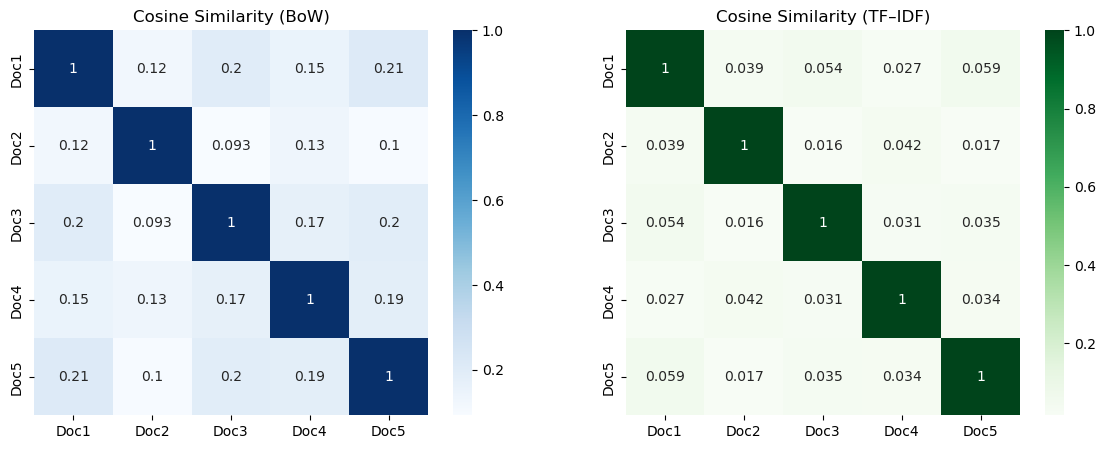

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.heatmap(cos_bow_df, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Cosine Similarity (BoW)")

sns.heatmap(cos_tfidf_df, annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Cosine Similarity (TF–IDF)")

plt.show()



- **Left (BoW):** Similarity is biased by common frequent words.  
- **Right (TF–IDF):** Similarity emphasises documents sharing distinctive terms.  


## 7: State-of-the-art Sentence Transformers for semantic similarity in sentences

The idea:
- **BoW** counts words.
- **TF–IDF** counts words but down-weights common ones.
- **Sentence embeddings** measure *meaning*, not just shared words.

What each produces
- **BoW**: a long, sparse vector of raw counts (one slot per vocabulary term).
- **TF–IDF**: same shape, but values are reweighted by term rarity → better than BoW for keyword matching.
- **Sentence embeddings**: a short, dense vector (e.g., 384–768 numbers) that captures the sentence’s overall meaning.

What "similarity: means
- BoW / TF–IDF cosine similarity: high only if two texts use many of the same words. Misses synonyms and paraphrases.
- Embedding cosine similarity: high if two texts mean the same thing, even with different wording.


To try the example with sentence embeddings we need a few extra libraries. They’re large and updated frequently, so version pinning avoids incompatibilities.

In [16]:
#!pip install -U "sentence-transformers==5.1.0" "transformers==4.49.0" "torch>=2.1,<3"

Verify versions (no importing the packages):

In [17]:
!python -m pip show transformers sentence-transformers torch

Name: transformers
Version: 4.49.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\Vitali\anaconda3\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: sentence-transformers
---
Name: sentence-transformers
Version: 5.1.0
Summary: Embeddings, Retrieval, and Reranking
Home-page: https://www.SBERT.net
Author: 
Author-email: Nils Reimers <info@nils-reimers.de>, Tom Aarsen <tom.aarsen@huggingface.co>
License: Apache 2.0
Location: C:\Users\Vitali\anaconda3\Lib\site-packages
Requires: huggingface-hub, Pillow, scikit-learn, scipy, torch, tqdm, transformers, typing_extensions
Required-by: 


In [28]:
# Cancelling a few bells and whistles for smoother sailing:

import os
os.environ["USE_TF"] = "0"
os.environ["USE_JAX"] = "0"
os.environ["TRANSFORMERS_NO_TF"] = "1"  # belt & braces

In [29]:
from sentence_transformers import SentenceTransformer
# Good general model; you can swap to "all-mpnet-base-v2" for higher quality
model = SentenceTransformer("all-MiniLM-L6-v2")


In [48]:
# Sanity checks:
def show_sims(texts, model, stop_words="english"):
    cv  = CountVectorizer(stop_words=stop_words)
    tfv = TfidfVectorizer(stop_words=stop_words)

    bow   = cv.fit_transform(texts)
    tfidf = tfv.fit_transform(texts)
    emb   = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)

    print(f"BOW    cosine similarity score: {cosine_similarity(bow)[0,1]:.2f}")
    print(f"TF–IDF cosine similarity score: {cosine_similarity(tfidf)[0,1]:.2f}")
    print(f"SBERT  cosine similarity score: {cosine_similarity(emb)[0,1]:.2f}")
    print("-" * 40)

In [51]:
# Example 1 (very similar meaning, low lexical overlap)
example_text1 = [
    "The firm inflated its green credentials in glossy reports, obscuring a weak ecological track record.",
    "The company's sustainability marketing burnished its image while concealing poor environmental performance."
]
show_sims(example_text1, model)

# Example 2 (very similar meaning, some lexical overlap, e.g. environmental)
example_text2 = [
    "The firm exaggerated its environmental credentials in polished disclosures, masking a poor ecological record.",
    "The company overstated its sustainability profile in sleek filings, hiding weak environmental performance."
]
show_sims(example_text2, model)

# Example 3 (very different meaning, no lexical overlap)
example_text3 = [
    "The firm inflated its green credentials in glossy reports, obscuring a weak ecological track record.",
    "The quick brown fox jumped over the lazy dog."
]
show_sims(example_text3, model)

BOW    cosine similarity score: 0.00
TF–IDF cosine similarity score: 0.00
SBERT  cosine similarity score: 0.54
----------------------------------------
BOW    cosine similarity score: 0.10
TF–IDF cosine similarity score: 0.05
SBERT  cosine similarity score: 0.62
----------------------------------------
BOW    cosine similarity score: 0.00
TF–IDF cosine similarity score: 0.00
SBERT  cosine similarity score: 0.07
----------------------------------------


Let's return to our main examle of texts defined earlier:

In [52]:
doc_names = [f"Doc{i+1}" for i in range(len(docs))]

emb = model.encode(docs, convert_to_numpy=True, normalize_embeddings=True)
cos_emb = cosine_similarity(emb)
cos_emb_df = pd.DataFrame(cos_emb, index=doc_names, columns=doc_names)

# from our eralier example:
display(cos_bow_df.style.background_gradient(cmap="Blues").format("{:.2f}"))
display(cos_tfidf_df.style.background_gradient(cmap="Greens").format("{:.2f}"))

# this is the new result:
display(cos_emb_df.style.background_gradient(cmap="Reds").format("{:.2f}"))

,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.00,0.12,0.20,0.15,0.21
Doc2,0.12,1.00,0.09,0.13,0.10
Doc3,0.20,0.09,1.00,0.17,0.20
Doc4,0.15,0.13,0.17,1.00,0.19
Doc5,0.21,0.10,0.20,0.19,1.00


,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.00,0.04,0.05,0.03,0.06
Doc2,0.04,1.00,0.02,0.04,0.02
Doc3,0.05,0.02,1.00,0.03,0.04
Doc4,0.03,0.04,0.03,1.00,0.03
Doc5,0.06,0.02,0.04,0.03,1.00


,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.00,0.49,0.42,0.32,0.26
Doc2,0.49,1.00,0.34,0.34,0.18
Doc3,0.42,0.34,1.00,0.43,0.35
Doc4,0.32,0.34,0.43,1.00,0.41
Doc5,0.26,0.18,0.35,0.41,1.00


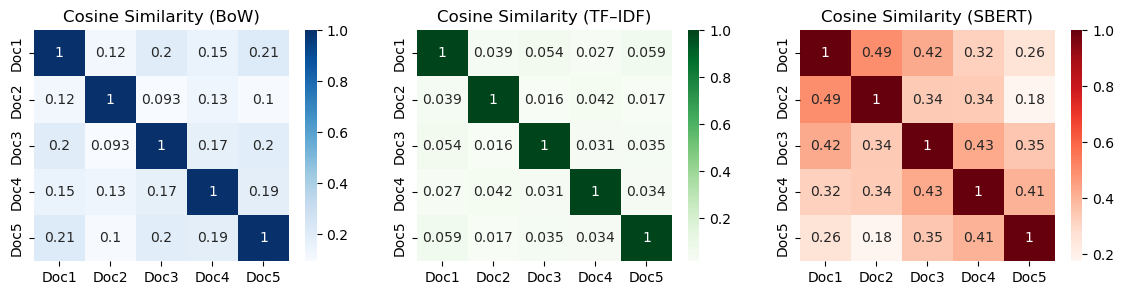

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(14,3))

sns.heatmap(cos_bow_df, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Cosine Similarity (BoW)")

sns.heatmap(cos_tfidf_df, annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Cosine Similarity (TF–IDF)")

sns.heatmap(cos_emb_df, annot=True, cmap="Reds", ax=axes[2])
axes[2].set_title("Cosine Similarity (SBERT)")

plt.show()

## 8. Interactive component

In [7]:
#!pip install -U ipywidgets widgetsnbextension
#!jupyter nbextension enable --py widgetsnbextension

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.8 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00

  Attempting uninstall: widgetsnbextension

    Found existing installation: widgetsnbextension 4.0.13

    Uninstalling widgetsnbextension-4.0.13:

      Successfully uninstalled widgetsnbextension-4.0.13

   ---------------------------------------- 0/3 [widgetsnbextension]
   ---------------------------------------- 0/3 [widgetsnbextension]
  Attempting uninstall: jupyterlab_widgets
   ---------------------------------------- 0/3 [widgetsnbextension]
    Found existing installation: jupyterlab_widgets 3.0.13
   ---------------------------------------- 0/3 [widgetsnbextension]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [3]:
import ipywidgets as widgets
from IPython.display import display

docs = [
    "This movie is very scary and long.",
    "This movie is not scary and is slow.",
    "This movie is spooky and good."
]

def update(new_sentence):
    all_docs = docs + [new_sentence]
    tfidf = TfidfVectorizer()
    mat = tfidf.fit_transform(all_docs)
    terms = tfidf.get_feature_names_out()
    df = pd.DataFrame(mat.toarray(), columns=terms)

    # Show TF–IDF vector for the NEW sentence (last row), nicely formatted
    styled = (
        df.tail(1)
          .style
          .format("{:.2f}")
          .background_gradient(cmap="Reds", vmin=0, vmax=1, axis=None)
    )
    display(styled)

widgets.interact(update, new_sentence="Enter your own sentence");

interactive(children=(Text(value='Enter your own sentence', description='new_sentence'), Output()), _dom_class…